# Import Libraries

In [45]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sampling Techniques
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, f1_score, matthews_corrcoef,
                             cohen_kappa_score, precision_score, recall_score)

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Save and Load Models
import joblib

import time


# Load Dataset

In [46]:
# %%
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = [
    "Status of existing checking account", "Duration in month", "Credit history", "Purpose",
    "Credit amount", "Savings account/bonds", "Present employment since",
    "Installment rate in percentage of disposable income", "Personal status and sex",
    "Other debtors / guarantors", "Present residence since", "Property",
    "Age in years", "Other installment plans", "Housing",
    "Number of existing credits at this bank", "Job",
    "Number of people being liable to provide maintenance for", "Telephone",
    "foreign worker", "Credit risk"
]

data = pd.read_csv(url, sep=" ", header=None, names=column_names)

# Display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [47]:
# Display the shape of the dataset
print("Dataset Shape:", data.shape)


Dataset Shape: (1000, 21)


In [48]:
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [49]:
data.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Credit risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [50]:
data.dtypes

,0
Status of existing checking account,object
Duration in month,int64
Credit history,object
Purpose,object
Credit amount,int64
Savings account/bonds,object
Present employment since,object
Installment rate in percentage of disposable income,int64
Personal status and sex,object
Other debtors / guarantors,object


Observations:

-The dataset consists of 1000 records with 20 features.
-The target variable is Credit risk with two classes: 1 (Good) and 2 (Bad).
-There are both categorical and numerical features.
-No missing values are present in the dataset.

# Data Preprocessing

### Handle Categorical Features

In [51]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the data
data_encoded = data.copy()

# Identify categorical features
categorical_features = data_encoded.select_dtypes(include=["object"]).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical features
for col in categorical_features:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])


In [52]:
data_encoded.dtypes

,0
Status of existing checking account,int64
Duration in month,int64
Credit history,int64
Purpose,int64
Credit amount,int64
Savings account/bonds,int64
Present employment since,int64
Installment rate in percentage of disposable income,int64
Personal status and sex,int64
Other debtors / guarantors,int64


In [53]:
# Check for missing values
missing_values = data_encoded.isnull().sum()
print(missing_values)

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

Observation: No missing values detected.

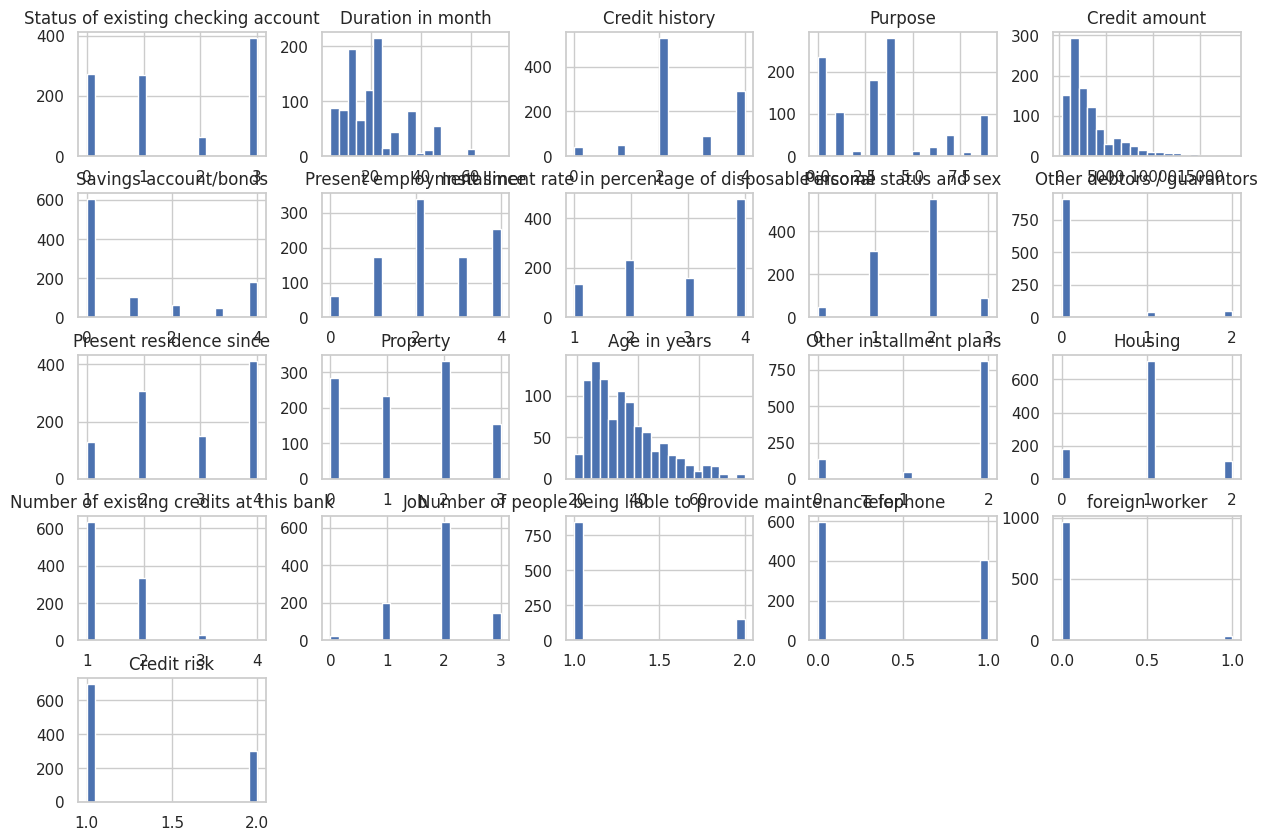

In [54]:
#distribution of numerical features
import matplotlib.pyplot as plt

data_encoded.hist(bins=20, figsize=(15, 10))
plt.show()

In [55]:
#Distribution of Catgeorical Features
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

categorical_features = data_encoded.select_dtypes(include=["int32"]).columns

# Iterate through categorical columns and plot their distributions
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_encoded, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha="right")
    plt.show()

### Feature Scaling and Outlier Treatment

In [56]:
# %%
# Identify categorical and numerical features
categorical_features = [
    "Status of existing checking account", "Credit history", "Purpose",
    "Savings account/bonds", "Present employment since", "Personal status and sex",
    "Other debtors / guarantors", "Property", "Other installment plans",
    "Housing", "Job", "Telephone", "foreign worker"
]

numerical_features = [
    "Duration in month", "Credit amount",
    "Installment rate in percentage of disposable income",
    "Present residence since", "Age in years",
    "Number of existing credits at this bank",
    "Number of people being liable to provide maintenance for"
]


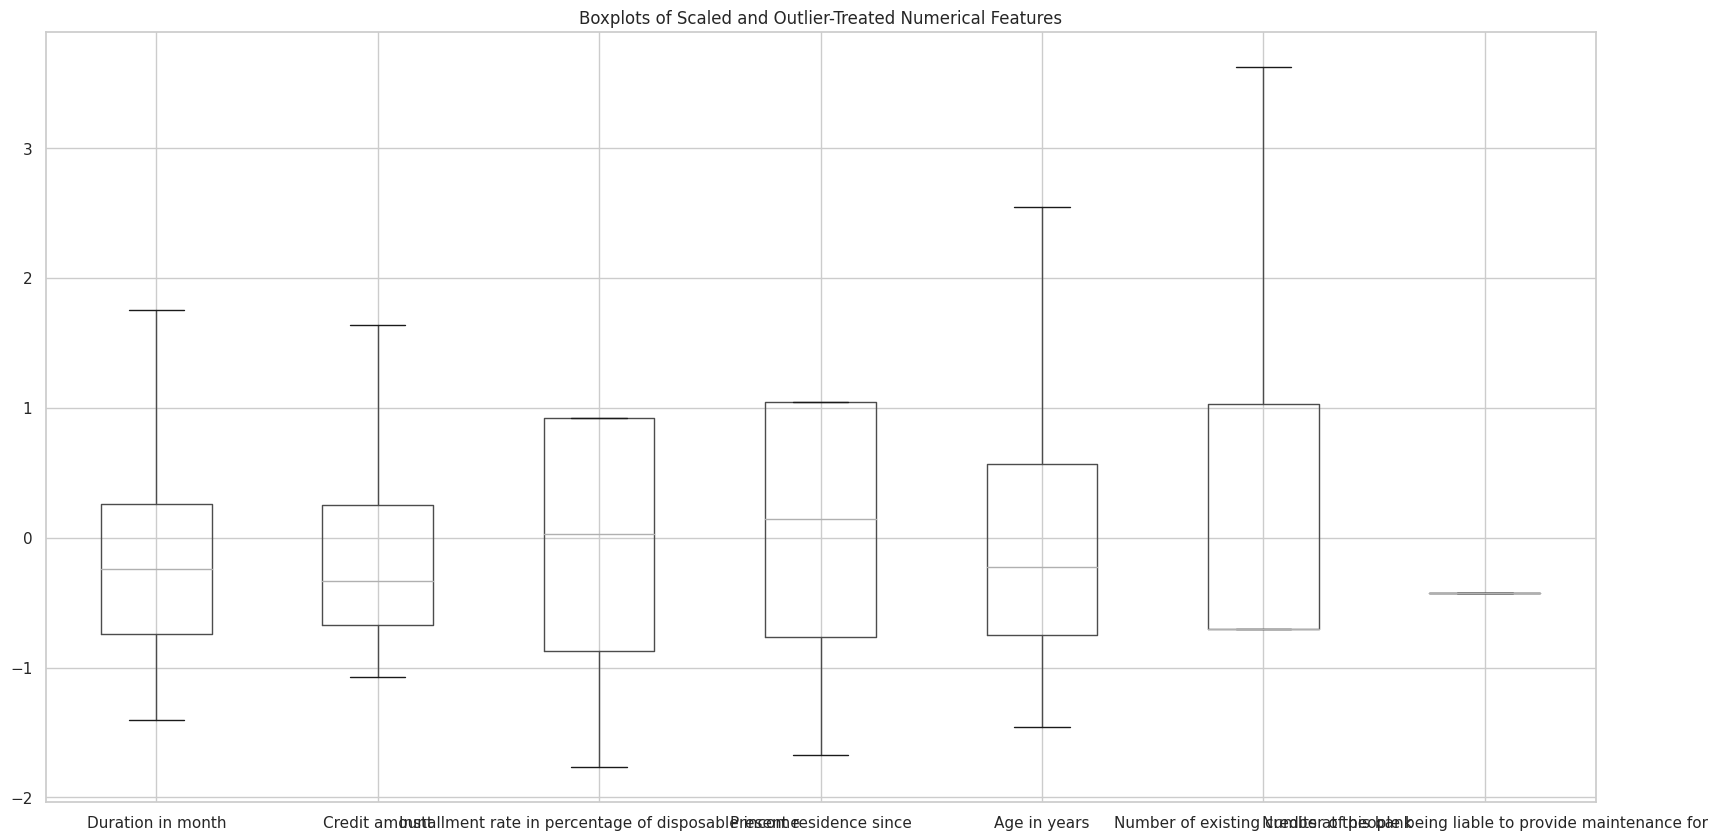

In [57]:
# %%
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_scaled = scaler.fit_transform(data[numerical_features])

# Convert back to DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

# Outlier treatment using IQR
for col in numerical_features:
    Q1 = X_scaled_df[col].quantile(0.25)
    Q3 = X_scaled_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the outliers
    X_scaled_df[col] = np.where(X_scaled_df[col] < lower_bound, lower_bound, X_scaled_df[col])
    X_scaled_df[col] = np.where(X_scaled_df[col] > upper_bound, upper_bound, X_scaled_df[col])

# Optionally, visualize the distribution after scaling and capping
X_scaled_df.boxplot(figsize=(20, 10))
plt.title("Boxplots of Scaled and Outlier-Treated Numerical Features")
plt.show()

### Feature Scaling

In [58]:
# %%
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid dummy variable trap

# Fit and transform the categorical features
categorical_encoded = onehot_encoder.fit_transform(data[categorical_features])

# Get the new column names
encoded_columns = onehot_encoder.get_feature_names_out(categorical_features)

# Convert to DataFrame
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoded_columns)

# Reset index to align with numerical features
categorical_encoded_df.reset_index(drop=True, inplace=True)
X_scaled_df.reset_index(drop=True, inplace=True)

# Combine numerical and categorical features
X_preprocessed = pd.concat([X_scaled_df, categorical_encoded_df], axis=1)

# Display the preprocessed feature set
print("Preprocessed Feature Set Shape:", X_preprocessed.shape)
# Display the column names of the preprocessed feature set
print("Columns in the Preprocessed Feature Set:")
print(X_preprocessed.columns)

Preprocessed Feature Set Shape: (1000, 48)
Columns in the Preprocessed Feature Set:
Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age in years',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for',
       'Status of existing checking account_A12',
       'Status of existing checking account_A13',
       'Status of existing checking account_A14', 'Credit history_A31',
       'Credit history_A32', 'Credit history_A33', 'Credit history_A34',
       'Purpose_A41', 'Purpose_A410', 'Purpose_A42', 'Purpose_A43',
       'Purpose_A44', 'Purpose_A45', 'Purpose_A46', 'Purpose_A48',
       'Purpose_A49', 'Savings account/bonds_A62', 'Savings account/bonds_A63',
       'Savings account/bonds_A64', 'Savings account/bonds_A65',
       'Present employment since_A72', 'Present employment since_A73',
       'Present employment since_A74', 'Presen

In [59]:
# %%
# Define the target variable
y = data['Credit risk'].map({1: 0, 2: 1})  # Map to 0 (Good) and 1 (Bad)

# Define the feature set
X = X_preprocessed

print("Feature Set Shape:", X.shape)
print("Target Variable Distribution:\n", y.value_counts())

Feature Set Shape: (1000, 48)
Target Variable Distribution:
 Credit risk
0    700
1    300
Name: count, dtype: int64


Observation:

-Classes: 0 (Good) and 1 (Bad)
-Class Distribution: Check for imbalance.

<ipython-input-60-d3ade8471176>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


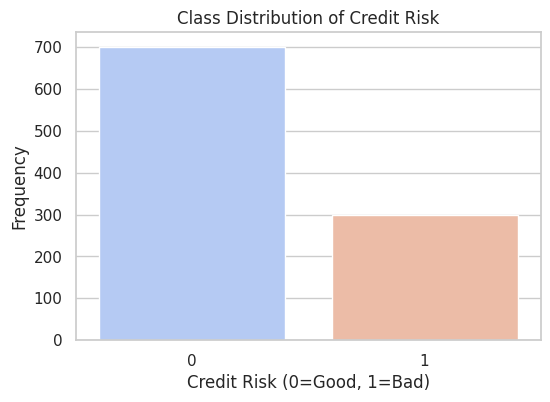

In [60]:
# %%
# Visualize the target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='coolwarm')
plt.title('Class Distribution of Credit Risk')
plt.xlabel('Credit Risk (0=Good, 1=Bad)')
plt.ylabel('Frequency')
plt.show()


Observation: If the classes are imbalanced, appropriate resampling techniques will be applied later.

### Feature Selection

In [61]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming X and y are defined

# Define variance thresholds
variance_thresholds = [0.01, 0.02]
best_features = []
best_metric_score = 0  # Initialize the best metric score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through each variance threshold
for threshold in variance_thresholds:
    print(f"\nApplying VarianceThreshold with threshold = {threshold}...")

    # Apply VarianceThreshold to remove low variance features
    selector = VarianceThreshold(threshold=threshold)
    X_train_filtered = selector.fit_transform(X_train)  # Filtered training data

    # Get the selected feature indices and names
    selected_feature_indices = selector.get_support(indices=True)
    selected_features = X_train.columns[selected_feature_indices].tolist()

    # Train a Random Forest model on the filtered training data
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_filtered, y_train)

    # Get the feature importances using MDI (Mean Decrease Impurity)
    feature_importances = pd.Series(rf_model.feature_importances_, index=selected_features)

    # Select features with importance above a certain threshold
    importance_threshold = 0.01  # or another threshold value you consider important
    selected_features_custom = feature_importances[feature_importances >= importance_threshold].index.tolist()

    print(f"Selected features for threshold {threshold} based on MDI:")
    print(selected_features_custom)

    # Re-filter X_train and X_test based on selected features
    X_train_custom_filtered = X_train[selected_features_custom]
    X_test_custom_filtered = X_test[selected_features_custom]

    # Re-train the model on the selected features
    rf_model.fit(X_train_custom_filtered, y_train)

    # Calculate a performance metric, e.g., accuracy or F1-score using cross-validation
    cv_scores = cross_val_score(rf_model, X_train_custom_filtered, y_train, cv=5, scoring='f1')
    metric_score = np.mean(cv_scores)  # Use the mean cross-validation score as the metric

    print(f"Cross-validated F1-score for threshold {threshold} based on MDI: {metric_score:.4f}")

    # Update the best features based on the cross-validated metric
    if metric_score > best_metric_score:
        best_metric_score = metric_score
        best_features = selected_features_custom

# After the loop, filter the original X and y based on best_features
X_best_filtered = X[best_features]
y_best_filtered = y  # y remains the same

print("\nFinal selected features based on the best cross-validated metric score and MDI:")
print(best_features)
print(f"Best cross-validated metric score: {best_metric_score:.4f}")
print("\nShape of best_X:", X_best_filtered.shape)



Applying VarianceThreshold with threshold = 0.01...
Selected features for threshold 0.01 based on MDI:
['Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since', 'Age in years', 'Number of existing credits at this bank', 'Status of existing checking account_A12', 'Status of existing checking account_A13', 'Status of existing checking account_A14', 'Credit history_A31', 'Credit history_A32', 'Credit history_A33', 'Credit history_A34', 'Purpose_A41', 'Purpose_A42', 'Purpose_A43', 'Purpose_A46', 'Purpose_A49', 'Savings account/bonds_A62', 'Savings account/bonds_A65', 'Present employment since_A72', 'Present employment since_A73', 'Present employment since_A74', 'Present employment since_A75', 'Personal status and sex_A92', 'Personal status and sex_A93', 'Other debtors / guarantors_A103', 'Property_A122', 'Property_A123', 'Property_A124', 'Other installment plans_A143', 'Housing_A152', 'Job_A172', 'Job_A173', 'Job_A174', 'Telep

### Class Balancing

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
import pandas as pd

# Fit and resample
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_best_filtered, y_best_filtered)

# Step 4: Check the shape and distribution after resampling
print("After Resampling:")
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled distribution:\n", pd.Series(y_train_resampled).value_counts())


After Resampling:
X_train_resampled shape: (1378, 36)
y_train_resampled distribution:
 Credit risk
0    689
1    689
Name: count, dtype: int64


### Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split

# Split the data with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_train_resampled, y_train_resampled ,test_size=0.2, stratify=y_train_resampled, random_state=42
)

print(f"Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Set Shape: {X_test.shape}, {y_test.shape}")
print(f"Test Set Shape: {X_test.shape}, {y_test.shape}")

Training Set Shape: (1102, 36), (1102,)
Test Set Shape: (276, 36), (276,)
Test Set Shape: (276, 36), (276,)


#XGBoost Classification

##Baseline model with default parameter

In [64]:
# Import necessary Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report,precision_recall_curve, roc_curve, auc
import xgboost as xgb
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import VotingClassifier

In [65]:
#Function to Evaluate Model

def xgb_evaluate_model(model, X, y, trial_name):
    start_time = time.time()
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    evaluation_time = time.time() - start_time

    print(f"\n{trial_name} Results:")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall:", recall_score(y, y_pred))
    print("F1 Score:", f1_score(y, y_pred))
    print("ROC AUC Score:", roc_auc_score(y, y_pred_proba))
    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {trial_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(f"Evaluation Time: {evaluation_time:.2f} seconds")

    return {
        "Model": trial_name,
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "F1 Score": f1_score(y, y_pred),
        "ROC AUC": roc_auc_score(y, y_pred_proba),
        "Evaluation Time": evaluation_time
    }

In [66]:
#Function to Plot Learning Curve

def xgb_plot_learning_curve(estimator, X, y, title):
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring="accuracy"
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [67]:
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", message="Parameters: { \"use_label_encoder\" } are not used.")

print("\nComparing different numbers of folds for cross-validation")
xgb_k_values = [3, 5, 10]
xgb_mean_scores = {}

xgb_base_classifier = xgb.XGBClassifier(eval_metric='logloss')

for k in xgb_k_values:
    scores = cross_val_score(xgb_base_classifier, X_train, y_train, cv=k, scoring='accuracy')
    mean_score = np.mean(scores)
    xgb_mean_scores[k] = mean_score
    print(f"Cross-validation scores for k={k}: {scores}")
    print(f"Mean Accuracy for k={k}: {mean_score*100:.4f}%\n")

xgb_best_k = max(xgb_mean_scores, key=xgb_mean_scores.get)
xgb_best_score = xgb_mean_scores[xgb_best_k]
print(f"The best number of folds (k) is {xgb_best_k} with a mean accuracy of {xgb_best_score*100:.4f}%")


Comparing different numbers of folds for cross-validation
Cross-validation scores for k=3: [0.80434783 0.83651226 0.82561308]
Mean Accuracy for k=3: 82.2158%

Cross-validation scores for k=5: [0.80090498 0.88235294 0.85454545 0.83181818 0.79545455]
Mean Accuracy for k=5: 83.3015%

Cross-validation scores for k=10: [0.78378378 0.81081081 0.81818182 0.87272727 0.83636364 0.86363636
 0.84545455 0.82727273 0.80909091 0.79090909]
Mean Accuracy for k=10: 82.5823%

The best number of folds (k) is 5 with a mean accuracy of 83.3015%


In [68]:
# Initialize lists to store results
xgb_results = []
xgb_timing_results = []


XGBoost Baseline Model (Trial 0)

XGBoost Baseline Model (Trial 0) Results:
Accuracy: 0.8152173913043478
Precision: 0.8
Recall: 0.8405797101449275
F1 Score: 0.8197879858657243
ROC AUC Score: 0.9065322411258139

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       138
           1       0.80      0.84      0.82       138

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:11:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


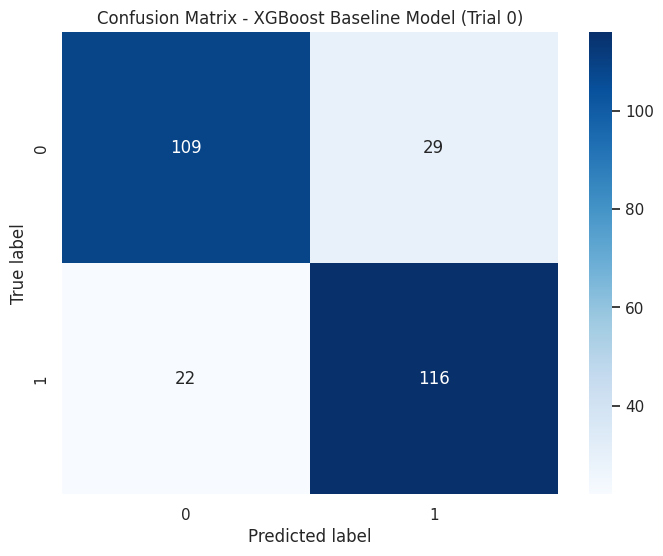

Evaluation Time: 0.02 seconds


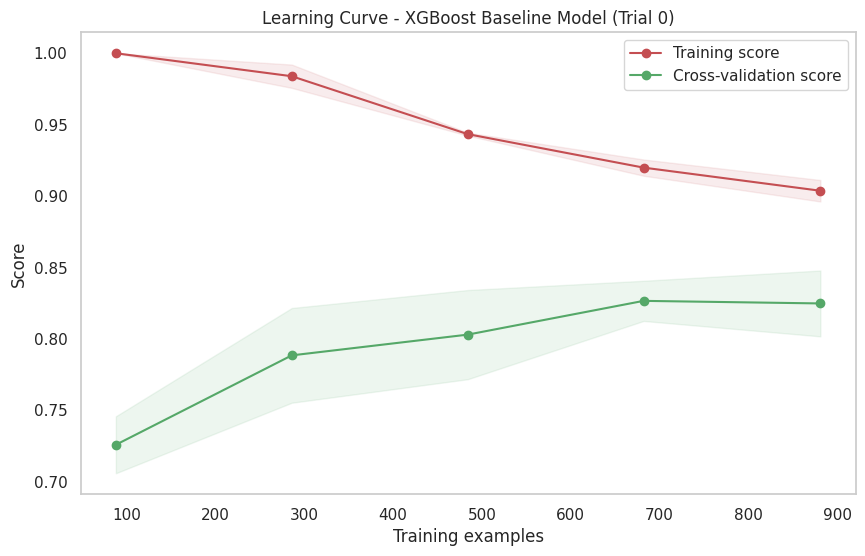

In [69]:
# Baseline Model
print("\nXGBoost Baseline Model (Trial 0)")
xgb_baseline_params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'use_label_encoder': False
}
xgb_baseline_model = xgb.XGBClassifier(**xgb_baseline_params)

xgb_start_time = time.time()
xgb_baseline_model.fit(X_train, y_train)
xgb_baseline_train_time = time.time() - xgb_start_time

xgb_baseline_results = xgb_evaluate_model(xgb_baseline_model, X_test, y_test, "XGBoost Baseline Model (Trial 0)")
xgb_plot_learning_curve(xgb_baseline_model, X_train, y_train, "Learning Curve - XGBoost Baseline Model (Trial 0)")

xgb_results.append(xgb_baseline_results)
xgb_timing_results.append({
    "Model": "XGBoost Baseline Model (Trial 0)",
    "Training Time": xgb_baseline_train_time,
    "Evaluation Time": xgb_baseline_results["Evaluation Time"]
})

##XGBoost Classication Hyperparameter Tuning Trial 1: Grid Search with K-Fold Cross-Validation


XGBoost Grid Search with Best K-Fold CV (Trial 1)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:12:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found for XGBoost Grid Search (Trial 1): {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.7}

XGBoost Grid Search (Trial 1) Results:
Accuracy: 0.8188405797101449
Precision: 0.7894736842105263
Recall: 0.8695652173913043
F1 Score: 0.8275862068965517
ROC AUC Score: 0.9025939928586432

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       138
           1       0.79      0.87      0.83       138

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



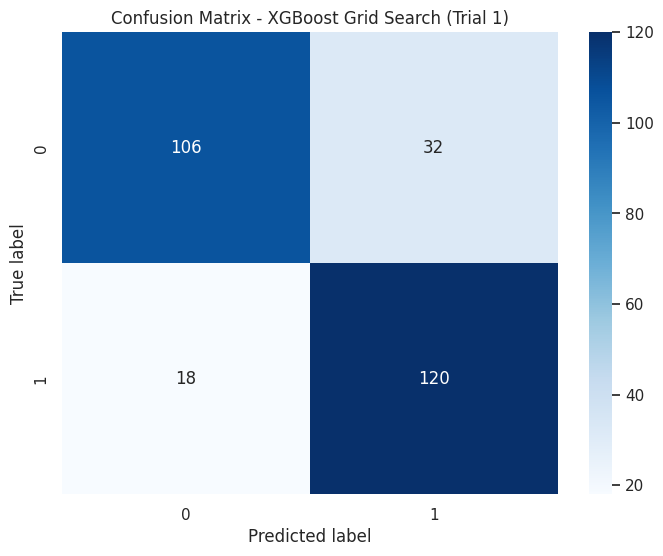

Evaluation Time: 0.02 seconds


In [70]:
# Trial 1: Grid Search with K-Fold Cross-Validation (Modified for smaller gap)
print("\nXGBoost Grid Search with Best K-Fold CV (Trial 1)")
xgb_param_grid_1 = {
    'max_depth': [2, 3],  # Reduced max depth
    'learning_rate': [0.01, 0.05],  # Lower learning rates
    'n_estimators': [50, 100],
    'min_child_weight': [3, 5],  # Increased min_child_weight
    'subsample': [0.7, 0.8],  # Reduced subsample
    'colsample_bytree': [0.7, 0.8],  # Reduced colsample_bytree
    'gamma': [0.1, 0.2]  # Added gamma for regularization
}

xgb_grid_search_1 = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic'),
    param_grid=xgb_param_grid_1,
    cv=xgb_best_k,
    n_jobs=-1,
    verbose=0,
    scoring='neg_log_loss'
)

xgb_start_time = time.time()
xgb_grid_search_1.fit(X_train, y_train)
xgb_trial1_train_time = time.time() - xgb_start_time

print("Best parameters found for XGBoost Grid Search (Trial 1):", xgb_grid_search_1.best_params_)
xgb_trial1_results = xgb_evaluate_model(xgb_grid_search_1.best_estimator_, X_test, y_test, "XGBoost Grid Search (Trial 1)")

xgb_results.append(xgb_trial1_results)
xgb_timing_results.append({
    "Model": "XGBoost Grid Search (Trial 1)",
    "Training Time": xgb_trial1_train_time,
    "Evaluation Time": xgb_trial1_results["Evaluation Time"]
})

##XGBoost Classication Hyperparameter Tuning Trial 2: Randomized Search with K-Fold Cross-Validation


XGBoost Randomized Search with Best K-Fold CV (Trial 2)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found for XGBoost Randomized Search (Trial 2): {'colsample_bytree': 0.7280327597210938, 'gamma': 0.01194413911804637, 'learning_rate': 0.08220874186038273, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 138, 'subsample': 0.6218919303539354}

XGBoost Randomized Search (Trial 2) Results:
Accuracy: 0.8152173913043478
Precision: 0.8041958041958042
Recall: 0.8333333333333334
F1 Score: 0.8185053380782917
ROC AUC Score: 0.9159840369670237

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       138
           1       0.80      0.83      0.82       138

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



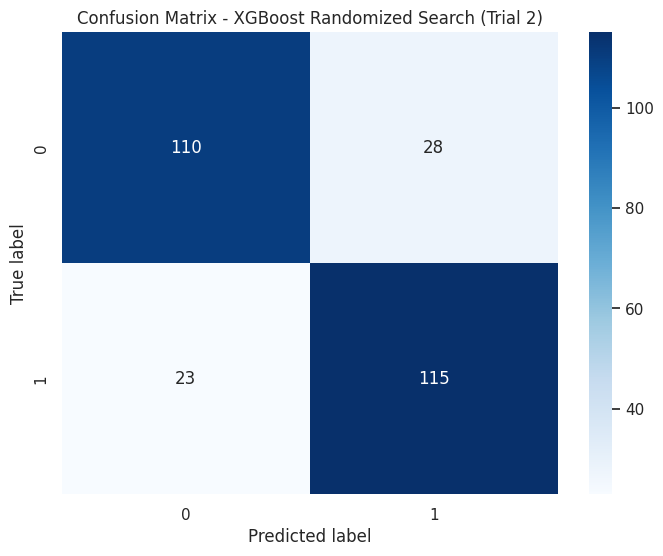

Evaluation Time: 0.02 seconds


In [71]:
# Trial 2: Randomized Search with K-Fold Cross-Validation
print("\nXGBoost Randomized Search with Best K-Fold CV (Trial 2)")
xgb_param_dist_2 = {
    'max_depth': randint(1, 4),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 200),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

xgb_random_search_2 = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic'),
    param_distributions=xgb_param_dist_2,
    n_iter=20,
    cv=xgb_best_k,
    n_jobs=-1,
    verbose=0,
    scoring='neg_log_loss'
)

xgb_start_time = time.time()
xgb_random_search_2.fit(X_train, y_train)
xgb_trial2_train_time = time.time() - xgb_start_time

print("Best parameters found for XGBoost Randomized Search (Trial 2):", xgb_random_search_2.best_params_)
xgb_trial2_results = xgb_evaluate_model(xgb_random_search_2.best_estimator_, X_test, y_test, "XGBoost Randomized Search (Trial 2)")

xgb_results.append(xgb_trial2_results)
xgb_timing_results.append({
    "Model": "XGBoost Randomized Search (Trial 2)",
    "Training Time": xgb_trial2_train_time,
    "Evaluation Time": xgb_trial2_results["Evaluation Time"]
})

##XGBoost Classication Hyperparameter Tuning Trial 3: Fine-tuning with K-Fold Cross-Validation


XGBoost Fine-tuning with Best K-Fold CV (Trial 3)
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found for XGBoost Fine-tuning (Trial 3): {'colsample_bytree': 0.7280327597210938, 'gamma': 0.01194413911804637, 'learning_rate': 0.08220874186038273, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 165, 'subsample': 0.6218919303539354}

XGBoost Fine-tuning (Trial 3) Results:
Accuracy: 0.8188405797101449
Precision: 0.8055555555555556
Recall: 0.8405797101449275
F1 Score: 0.8226950354609929
ROC AUC Score: 0.9162465868515018

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       138
           1       0.81      0.84      0.82       138

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



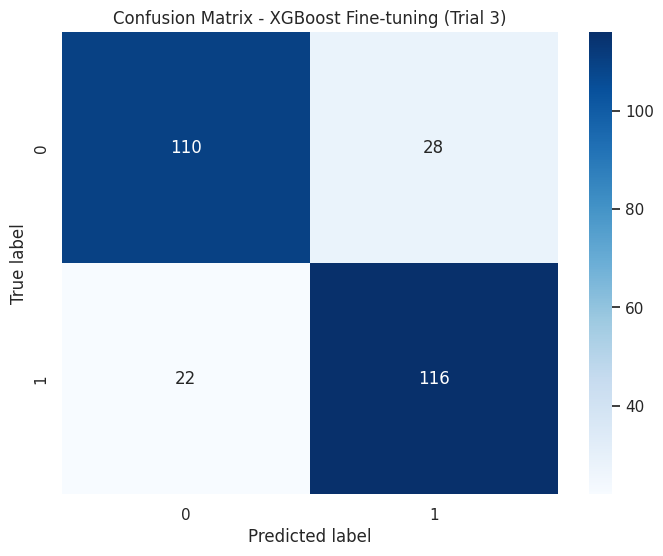

Evaluation Time: 0.06 seconds


In [72]:
# Trial 3: Fine-tuning with K-Fold Cross-Validation
print("\nXGBoost Fine-tuning with Best K-Fold CV (Trial 3)")
xgb_best_params_2 = xgb_random_search_2.best_params_
xgb_param_grid_3 = {}

for k, v in xgb_best_params_2.items():
    if isinstance(v, int):
        xgb_param_grid_3[k] = [v, int(v * 1.2)]  # Round to nearest integer for int parameters
    elif isinstance(v, float):
        xgb_param_grid_3[k] = [v, v * 1.2]
    else:
        xgb_param_grid_3[k] = [v]

xgb_grid_search_3 = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic'),  # Removed use_label_encoder
    param_grid=xgb_param_grid_3,
    cv=xgb_best_k,
    n_jobs=-1,
    verbose=1,  # Increased verbosity to see more details
    scoring='neg_log_loss',
    error_score='raise'  # This will raise errors instead of setting them to NaN
)

xgb_start_time = time.time()
xgb_grid_search_3.fit(X_train, y_train)
xgb_trial3_train_time = time.time() - xgb_start_time

print("Best parameters found for XGBoost Fine-tuning (Trial 3):", xgb_grid_search_3.best_params_)
xgb_trial3_results = xgb_evaluate_model(xgb_grid_search_3.best_estimator_, X_test, y_test, "XGBoost Fine-tuning (Trial 3)")

xgb_results.append(xgb_trial3_results)
xgb_timing_results.append({
    "Model": "XGBoost Fine-tuning (Trial 3)",
    "Training Time": xgb_trial3_train_time,
    "Evaluation Time": xgb_trial3_results["Evaluation Time"]
})

##XGBoost Classication Hyperparameter Tuning Trial 4: XGBoost Ensemble


XGBoost Ensemble of Best Models (Trial 4)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Ensemble of Best Models (Trial 4) Results:
Accuracy: 0.822463768115942
Precision: 0.8068965517241379
Recall: 0.8478260869565217
F1 Score: 0.8268551236749117
ROC AUC Score: 0.9161940768746061

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       138
           1       0.81      0.85      0.83       138

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



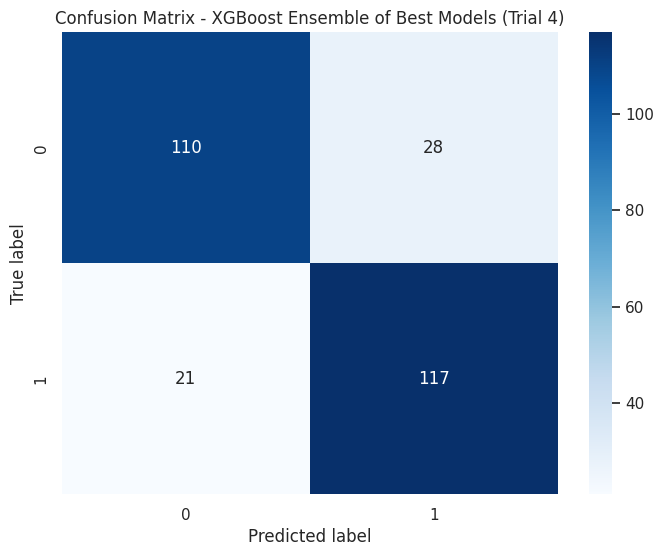

Evaluation Time: 0.06 seconds


In [73]:
# Trial 4: Ensemble of Best Models
print("\nXGBoost Ensemble of Best Models (Trial 4)")
xgb_estimators = [
    ('grid_search', xgb_grid_search_1.best_estimator_),
    ('random_search', xgb_random_search_2.best_estimator_),
    ('fine_tuned', xgb_grid_search_3.best_estimator_)
]

xgb_ensemble_model = VotingClassifier(estimators=xgb_estimators, voting='soft')

xgb_start_time = time.time()
xgb_ensemble_model.fit(X_train, y_train)
xgb_trial4_train_time = time.time() - xgb_start_time

xgb_trial4_results = xgb_evaluate_model(xgb_ensemble_model, X_test, y_test, "XGBoost Ensemble of Best Models (Trial 4)")

xgb_results.append(xgb_trial4_results)
xgb_timing_results.append({
    "Model": "XGBoost Ensemble of Best Models (Trial 4)",
    "Training Time": xgb_trial4_train_time,
    "Evaluation Time": xgb_trial4_results["Evaluation Time"]
})

## XGBoost Baseline and Trials Model Comparison

In [74]:
# Compare all models
xgb_results_df = pd.DataFrame(xgb_results)
print("\nComparison of All XGBoost Models:")
print(xgb_results_df)

xgb_timing_df = pd.DataFrame(xgb_timing_results)
print("\nTiming Comparison of XGBoost Models:")
print(xgb_timing_df)


Comparison of All XGBoost Models:
                                       Model  Accuracy  Precision    Recall  \
0           XGBoost Baseline Model (Trial 0)  0.815217   0.800000  0.840580   
1              XGBoost Grid Search (Trial 1)  0.818841   0.789474  0.869565   
2        XGBoost Randomized Search (Trial 2)  0.815217   0.804196  0.833333   
3              XGBoost Fine-tuning (Trial 3)  0.818841   0.805556  0.840580   
4  XGBoost Ensemble of Best Models (Trial 4)  0.822464   0.806897  0.847826   

   F1 Score   ROC AUC  Evaluation Time  
0  0.819788  0.906532         0.020887  
1  0.827586  0.902594         0.017885  
2  0.818505  0.915984         0.018022  
3  0.822695  0.916247         0.058863  
4  0.826855  0.916194         0.063512  

Timing Comparison of XGBoost Models:
                                       Model  Training Time  Evaluation Time
0           XGBoost Baseline Model (Trial 0)       0.109087         0.020887
1              XGBoost Grid Search (Trial 1)      48

, ,,

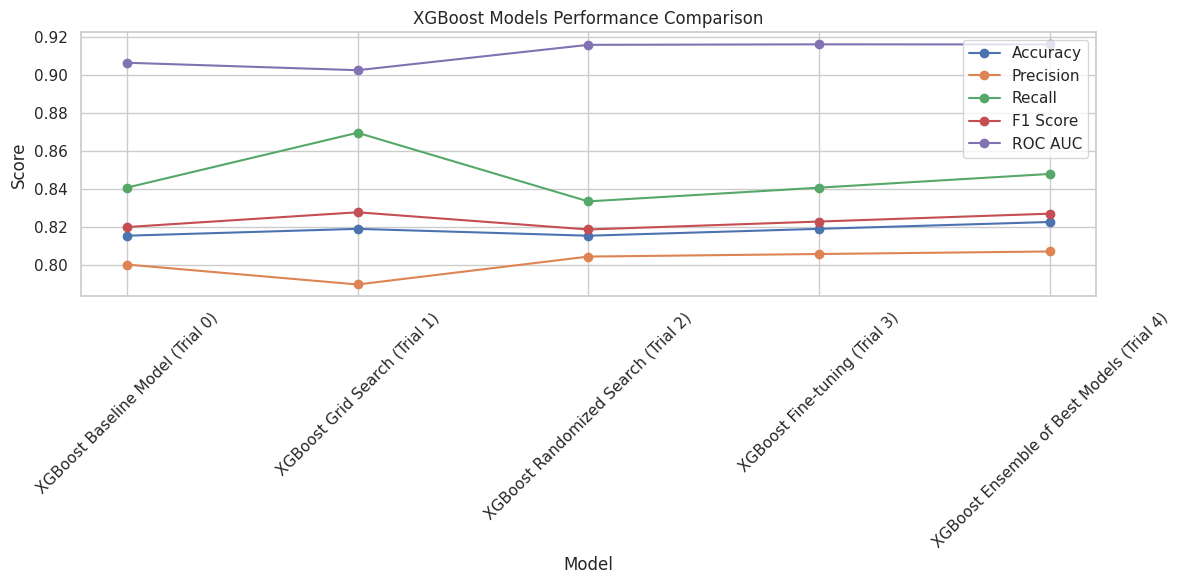

In [75]:
# Visualize the comparison
plt.figure(figsize=(12, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
for metric in metrics:
    plt.plot(xgb_results_df["Model"], xgb_results_df[metric], marker='o', label=metric)

plt.title("XGBoost Models Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

























## Select Best XGBoost Model












Ranked XGBoost Models:
                                       Model  overall_rank  Accuracy  \
4  XGBoost Ensemble of Best Models (Trial 4)           1.6  0.822464   
3              XGBoost Fine-tuning (Trial 3)           2.4  0.818841   
1              XGBoost Grid Search (Trial 1)           2.9  0.818841   
0           XGBoost Baseline Model (Trial 0)           4.0  0.815217   
2        XGBoost Randomized Search (Trial 2)           4.1  0.815217   

   Precision    Recall  F1 Score   ROC AUC  
4   0.806897  0.847826  0.826855  0.916194  
3   0.805556  0.840580  0.822695  0.916247  
1   0.789474  0.869565  0.827586  0.902594  
0   0.800000  0.840580  0.819788  0.906532  
2   0.804196  0.833333  0.818505  0.915984  

Best XGBoost Model based on all metrics:
Model              XGBoost Ensemble of Best Models (Trial 4)
Accuracy                                            0.822464
Precision                                           0.806897
Recall                                          

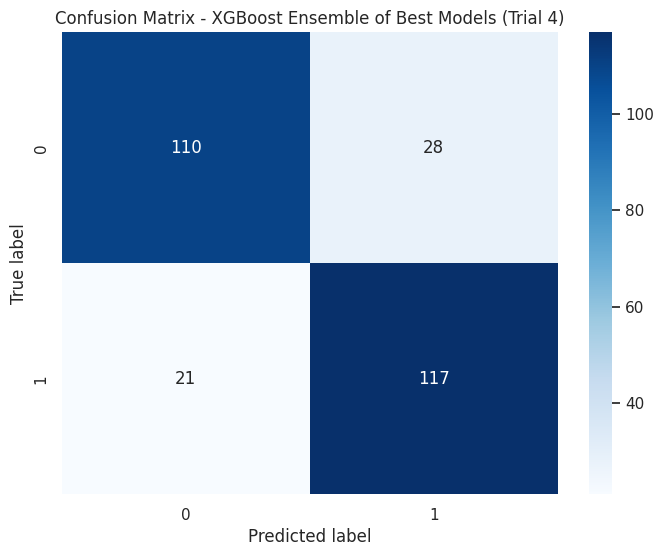

Evaluation Time: 0.05 seconds


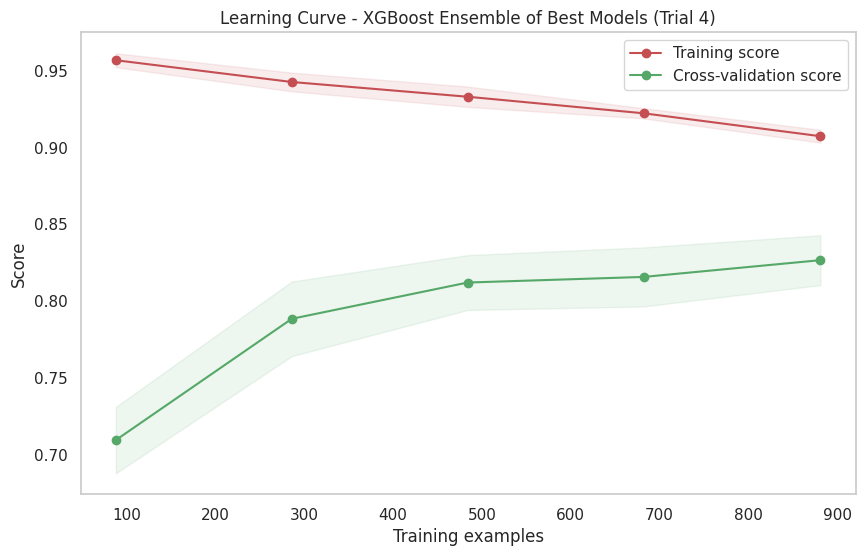

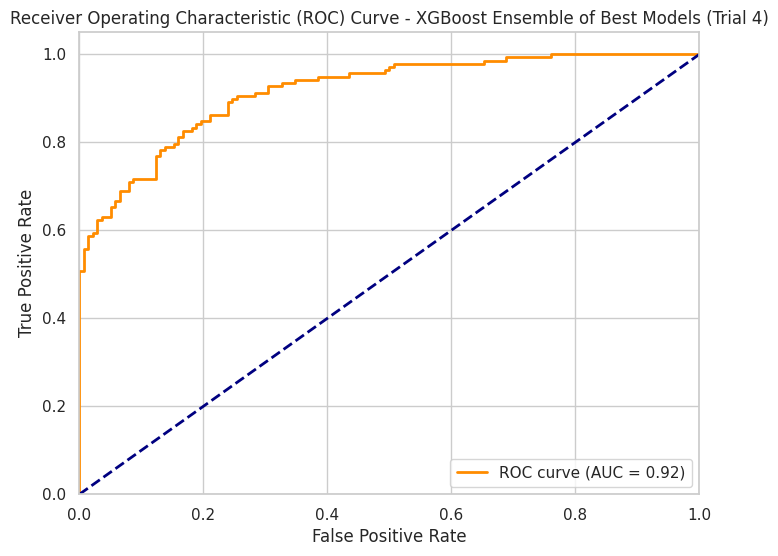

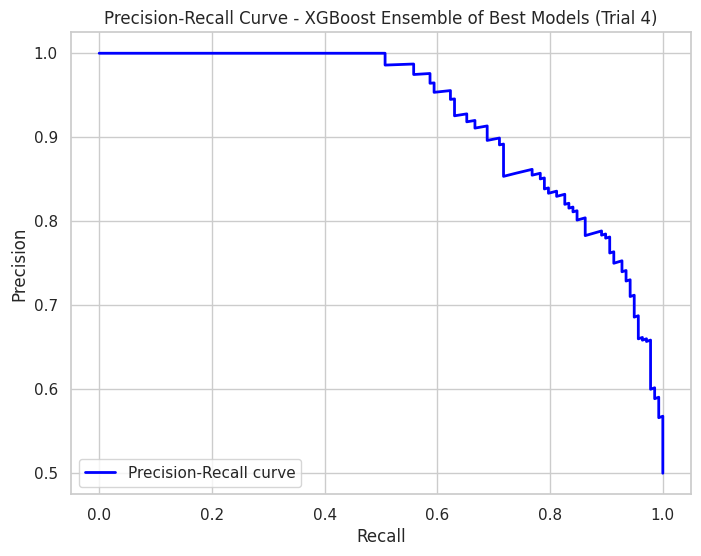

In [76]:
# Select the best model based on all metrics
def rank_models(df, metrics):
    df_ranked = df.copy()
    for metric in metrics:
        df_ranked[f'{metric}_rank'] = df_ranked[metric].rank(ascending=False)
    df_ranked['overall_rank'] = df_ranked[[f'{metric}_rank' for metric in metrics]].mean(axis=1)
    return df_ranked.sort_values('overall_rank')

ranked_models = rank_models(xgb_results_df, metrics)
xgb_best_model = ranked_models.iloc[0]

print("\nRanked XGBoost Models:")
print(ranked_models[['Model', 'overall_rank'] + metrics])

print("\nBest XGBoost Model based on all metrics:")
print(xgb_best_model)

# Declare the best estimator
xgb_best_estimator = None
if xgb_best_model["Model"] == "XGBoost Baseline Model (Trial 0)":
    xgb_best_estimator = xgb_baseline_model
elif xgb_best_model["Model"] == "XGBoost Grid Search (Trial 1)":
    xgb_best_estimator = xgb_grid_search_1.best_estimator_
elif xgb_best_model["Model"] == "XGBoost Randomized Search (Trial 2)":
    xgb_best_estimator = xgb_random_search_2.best_estimator_
elif xgb_best_model["Model"] == "XGBoost Fine-tuning (Trial 3)":
    xgb_best_estimator = xgb_grid_search_3.best_estimator_
elif xgb_best_model["Model"] == "XGBoost Ensemble of Best Models (Trial 4)":
    xgb_best_estimator = xgb_ensemble_model

# Ensure we have a valid best estimator
if xgb_best_estimator is None:
    raise ValueError("No valid best estimator found. Check the model selection process.")

# Comprehensive evaluation and visualization for the best model
print(f"\nDetailed Evaluation of {xgb_best_model['Model']}")
xgb_best_results = xgb_evaluate_model(xgb_best_estimator, X_test, y_test, xgb_best_model['Model'])# Learning Curve
xgb_plot_learning_curve(xgb_best_estimator, X_train, y_train, f"Learning Curve - {xgb_best_model['Model']}")

# Feature Importance (if applicable)
if hasattr(xgb_best_estimator, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    importances = xgb_best_estimator.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

    plt.title(f"Feature Importances - {xgb_best_model['Model']}")
    plt.bar(range(min(20, len(importances))), importances[indices][:20])
    plt.xticks(range(min(20, len(importances))), [feature_names[i] for i in indices[:20]], rotation=90)
    plt.tight_layout()
    plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
y_pred_proba = xgb_best_estimator.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"Receiver Operating Characteristic (ROC) Curve - {xgb_best_model['Model']}")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f"Precision-Recall Curve - {xgb_best_model['Model']}")
plt.legend(loc="lower left")
plt.show()